# Customer Churn Prediction

### Problem Statement:
This model identifies whether the customer is churned or not based on historical customer information including features such as CustomerID, Name, Age, Gender, Location, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB

### Data:
The data provided is in Excel format with 100000 rows and 9 columns

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_excel('customer_churn.xlsx')

Lets make a copr of the dataset

In [3]:
df1=df.copy()

Show Top 5 Records

In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


Shape of the dataset

In [5]:
df.shape

(100000, 9)

### Dataset information
- CustomerID
- Name 
- Age : Age of the customer in years
- Gender : sex of students -> (Male/female)
- Location : Location of the Customer
- Subscription_Length_Months : Subscription Duration in Months
- Monthly_Bill : Monthly Charges based on Usage
- Total_Usage_GB: Total Usage in GB
- Churn : Churned or Not Churned -> (1,0)

### Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

Check Missing values

In [6]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

Check Duplicates

In [7]:
df.duplicated().sum()

0

Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


Checking the number of unique values of each column

In [9]:
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

Check Statistics of Data

In [10]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


### Data Visualization

Plotting the correlation matrix and pair plot to identify relationship between the features/

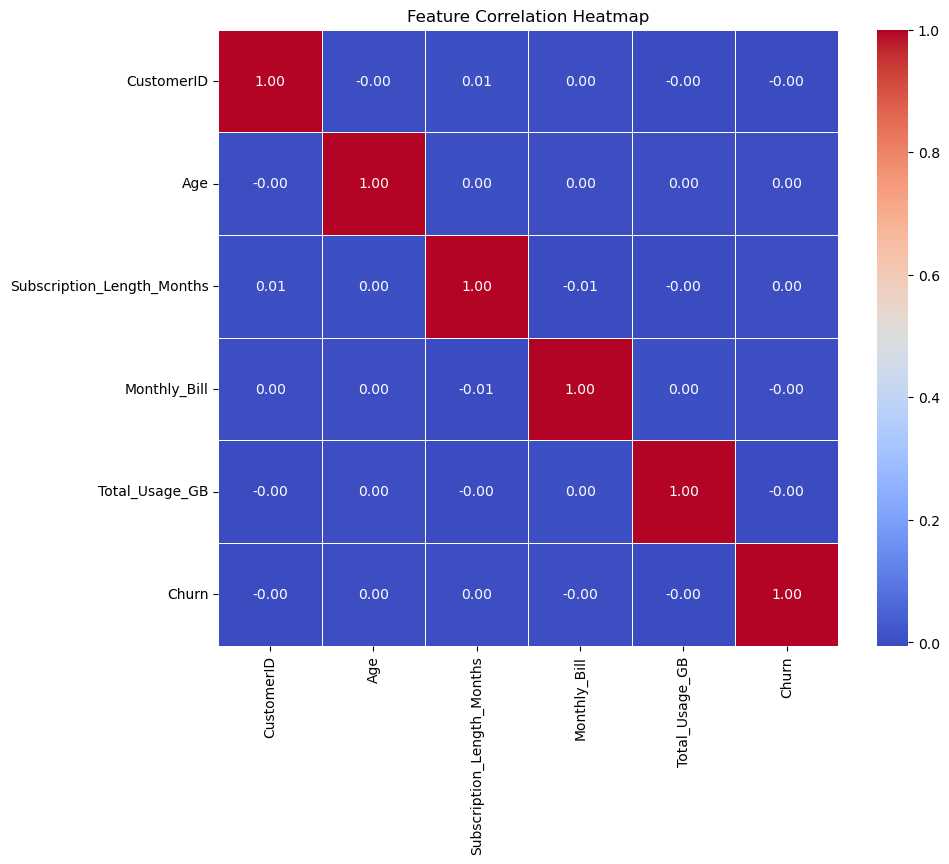

In [11]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Feature Correlation Heatmap')

# Show the plot
plt.show()

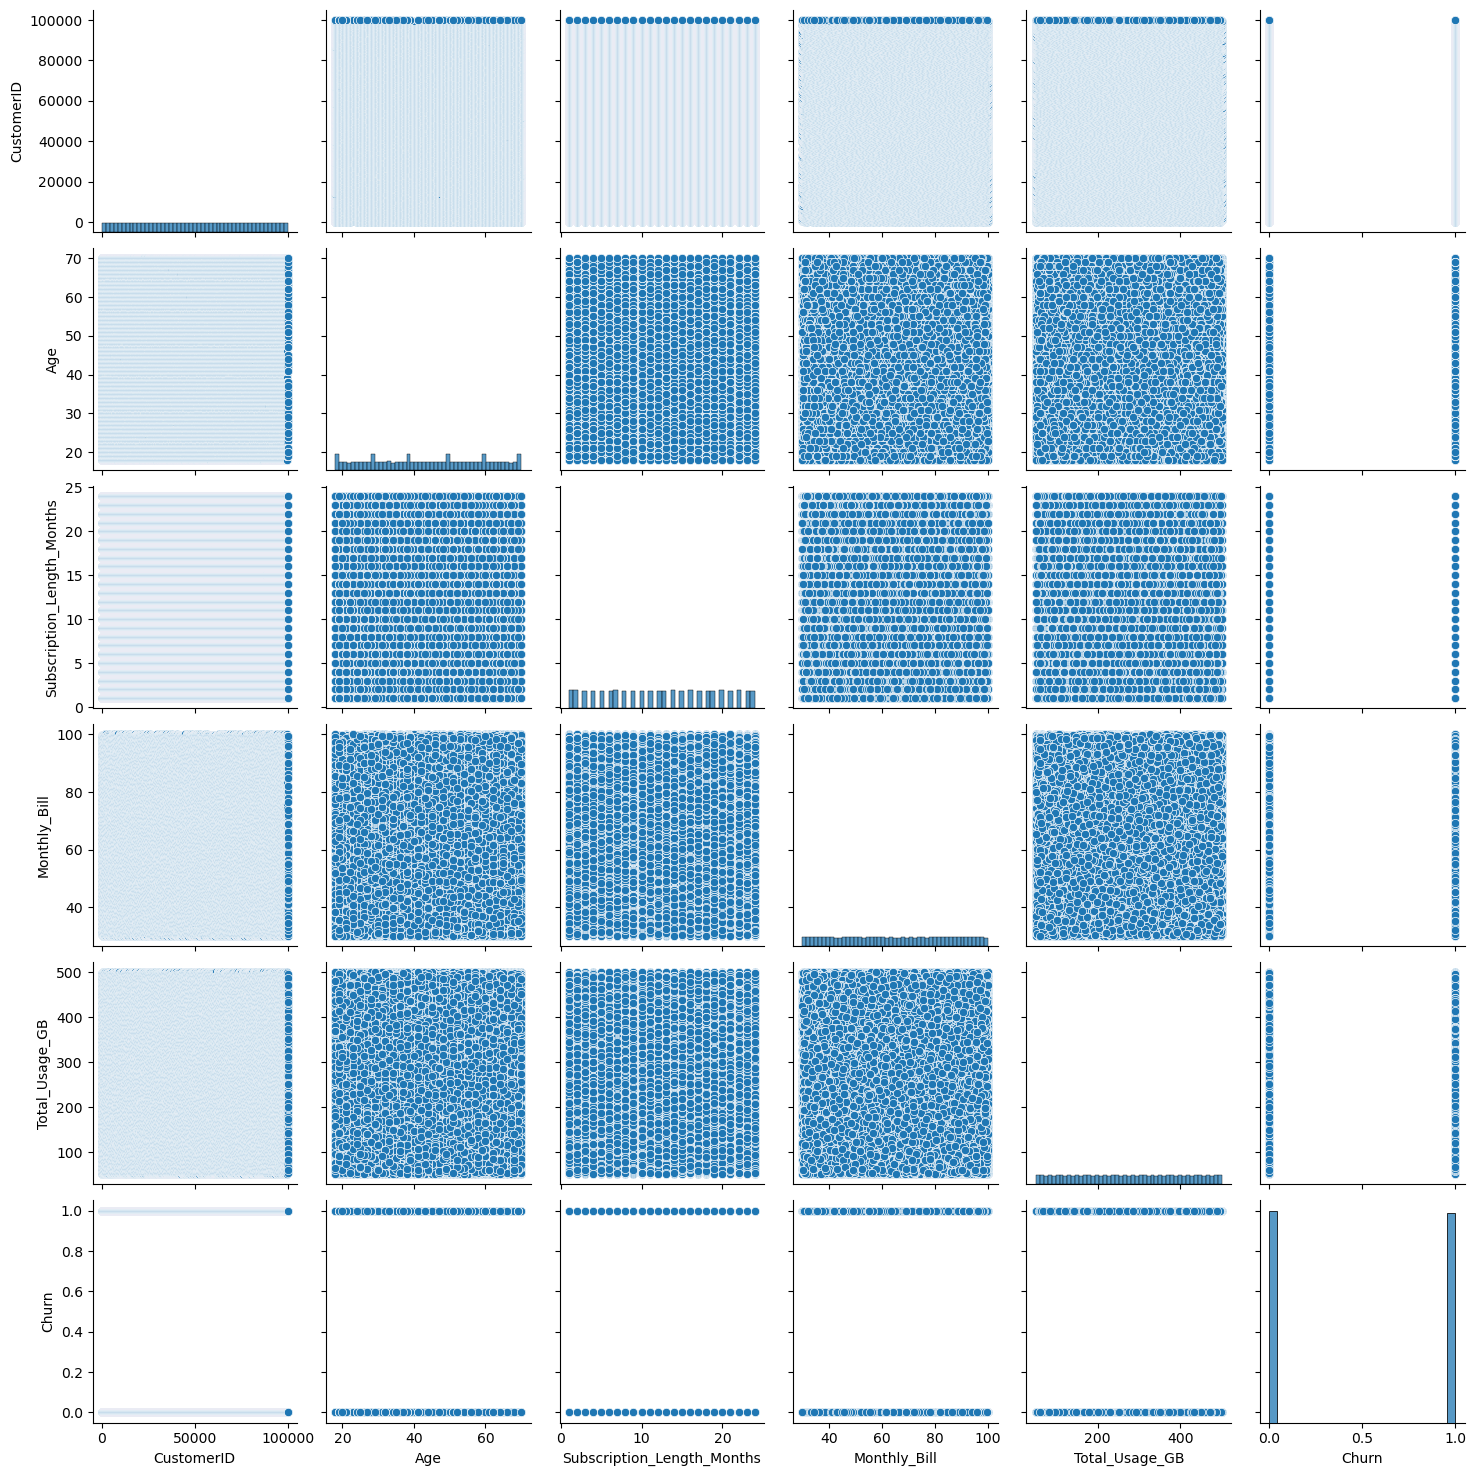

In [12]:
sns.pairplot(df)

Finding Outliers in Numerical features, if any

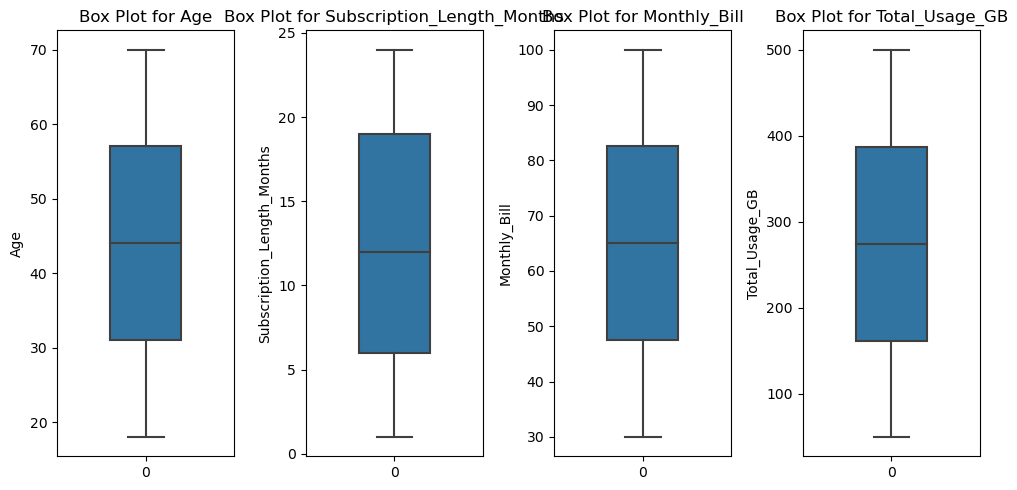

In [13]:
# Create a subplot with four box plots in one row
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

# List of columns to plot
columns_to_plot = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Loop through each column and create a box plot
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, 4, i+1)  # 1 row, 4 columns of subplots
    sns.boxplot(data=df[column], orient='vertical', width=0.4)
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

Visualizing the number of customers churned and not churned based on Gender and Location

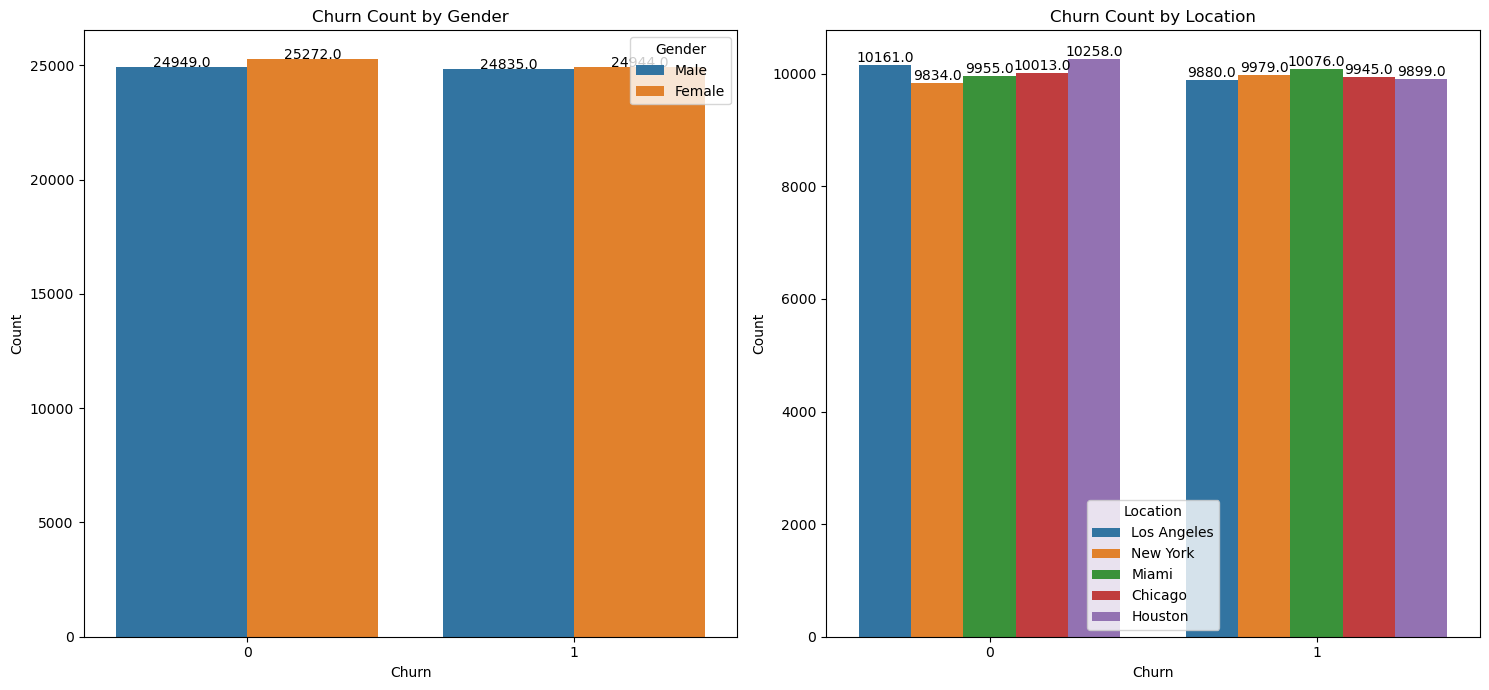

In [14]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Churn Count by Gender
sns.countplot(data=df1, x='Churn', hue='Gender', ax=axs[0])
axs[0].set_xlabel('Churn')
axs[0].set_ylabel('Count')
axs[0].set_title('Churn Count by Gender')

# Annotate the bars with count values
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Plot 2: Add your second subplot here
sns.countplot(data=df1, x='Churn', hue='Location', ax=axs[1])
axs[1].set_xlabel('Churn')
axs[1].set_ylabel('Count')
axs[1].set_title('Churn Count by Location')

# Annotate the bars with count values
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Exploring Data

In [15]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [16]:
print("Categories in 'Name' variable: ",end=" " )
print(df['Name'].unique())

print("Categories in 'Gender' variable: ",end=" ")
print(df['Gender'].unique())

print("Categories in'Location' variable: ",end=" " )
print(df['Location'].unique())

Categories in 'Name' variable:  ['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']
Categories in 'Gender' variable:  ['Male' 'Female']
Categories in'Location' variable:  ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']

We have 3 categorical features : ['Name', 'Gender', 'Location']


Now lets drop out the categorical "Name" column as "Name" doesnt represent the actual name of the customer, instead it is just an add on of "Customer_" to CustomerIDs

In [18]:
df.drop(['Name'],inplace=True,axis=1)

#### Converting Categorical Features to Numerical Features using Encoding Techniques
We have two categorical features remaining i.e. "Gender" and "Location" with number of unique values as 2 and 5. As we have less number of unique values in our features, lets consider the One-Hot Enoding Technique rather than considering Mean Encoding and Frequency Encoding

In [19]:
# Perform one-hot encoding with first_drop=True to avoid variable trap
df = pd.get_dummies(df, columns=['Gender','Location'], drop_first=True)

In [20]:
df

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,63,17,73.36,236,0,1,0,1,0,0
1,2,62,1,48.76,172,0,0,0,0,0,1
2,3,24,5,85.47,460,0,0,0,1,0,0
3,4,36,3,97.94,297,1,0,0,0,1,0
4,5,46,19,58.14,266,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,33,23,55.13,226,1,1,1,0,0,0
99996,99997,62,19,61.65,351,0,0,0,0,0,1
99997,99998,64,17,96.11,251,1,1,0,0,0,0
99998,99999,51,20,49.25,434,1,0,0,0,0,1


### Model Training

Preparing X and Y Variables

In [21]:
X = df.drop(columns=['Churn'],axis=1)

In [22]:
X.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,63,17,73.36,236,1,0,1,0,0
1,2,62,1,48.76,172,0,0,0,0,1
2,3,24,5,85.47,460,0,0,1,0,0
3,4,36,3,97.94,297,0,0,0,1,0
4,5,46,19,58.14,266,0,0,0,1,0


In [23]:
y = df['Churn']

In [24]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

Calculating Importance of features in our training data 'X' based on our target variable 'y' using Random Forest Classifier

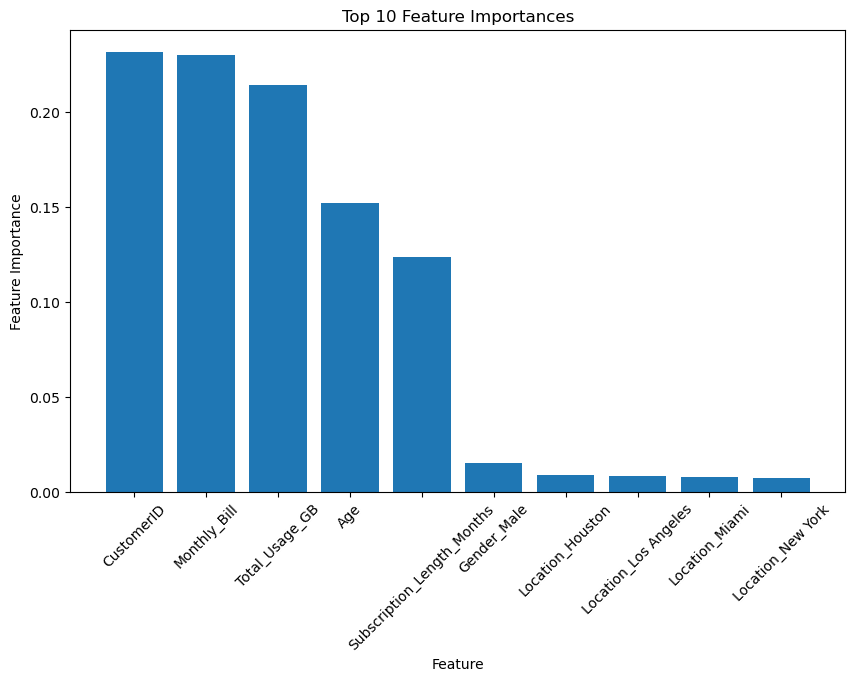

In [25]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model on your dataset
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort features by importance
sorted_idx = feature_importances.argsort()[::-1]

# Get the names of the top N important features
top_n = 10
top_features = X.columns[sorted_idx][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[sorted_idx][:top_n])
plt.xticks(range(top_n), top_features, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Top {} Feature Importances".format(top_n))
plt.show()


As we from statistics of Data that the mean of our features are not close to each other and hence it can have implications for certain machine learning algorithms. Feature scaling is a preprocessing step that aims to bring all features to a similar scale.
In this data we are performing Standardization also known as Z-score normalization: This method scales features to have a mean of 0 and a standard deviation of 1. It's suitable for most algorithms and is performed using the formula '(x - mean) / standard deviation'.

In [26]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X = scaler.fit_transform(X)

In [27]:
X.shape

(100000, 10)

Splitting the dataset for Training and Testing with the ratio of 0.8:0.2

In [28]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((80000, 10), (20000, 10))

Applying different classification algorithms, calculating model evaluation parameters and finding the best model based on Receiver Operating Characteristic(ROC) Area Under the Curve(AUC) score.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Create lists to store model names and ROC AUC scores
model_list = []
roc_auc_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Handle models that do not support predict_proba
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        roc_auc = None

    # Print and store results
    print(model_name)
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1-Score: {:.4f}".format(f1))
    
    if roc_auc is not None:
        print("ROC AUC: {:.4f}".format(roc_auc))
    else:
        print("ROC AUC: Not available for this model")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("=" * 40)
    
    model_list.append(model_name)
    roc_auc_list.append(roc_auc if roc_auc is not None else 0.0)

# Rank models by ROC AUC score (skip models without ROC AUC)
model_ranking = sorted([(model_name, roc_auc) for model_name, roc_auc in zip(model_list, roc_auc_list) if roc_auc is not None],
                       key=lambda x: x[1], reverse=True)

print("Model Rankings (by ROC AUC):")
for i, (model_name, roc_auc) in enumerate(model_ranking, start=1):
    print(f"{i}. {model_name}: ROC AUC = {roc_auc:.4f}")


Logistic Regression
Accuracy: 0.5059
Precision: 0.5026
Recall: 0.3848
F1-Score: 0.4359
ROC AUC: 0.5027
Confusion Matrix:
[[6300 3779]
 [6103 3818]]
Decision Tree Classifier
Accuracy: 0.5018
Precision: 0.4978
Recall: 0.5010
F1-Score: 0.4994
ROC AUC: 0.5017
Confusion Matrix:
[[5065 5014]
 [4951 4970]]
Random Forest Classifier
Accuracy: 0.4919
Precision: 0.4872
Recall: 0.4595
F1-Score: 0.4729
ROC AUC: 0.4905
Confusion Matrix:
[[5280 4799]
 [5362 4559]]
Gradient Boosting Classifier
Accuracy: 0.5036
Precision: 0.4995
Recall: 0.4330
F1-Score: 0.4639
ROC AUC: 0.5033
Confusion Matrix:
[[5775 4304]
 [5625 4296]]
AdaBoost Classifier
Accuracy: 0.5030
Precision: 0.4989
Recall: 0.4185
F1-Score: 0.4552
ROC AUC: 0.5028
Confusion Matrix:
[[5908 4171]
 [5769 4152]]
K-Neighbors Classifier
Accuracy: 0.4929
Precision: 0.4888
Recall: 0.4864
F1-Score: 0.4876
ROC AUC: 0.4922
Confusion Matrix:
[[5032 5047]
 [5095 4826]]
Naive Bayes
Accuracy: 0.5063
Precision: 0.5027
Recall: 0.4410
F1-Score: 0.4698
ROC AUC: 0.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Create lists to store model names and ROC AUC scores
model_list = []
roc_auc_list = []

for model_name, model in models.items():
    # Define hyperparameter grids for each model
    param_grid = {
        "Logistic Regression": {
            'C': [0.01],
            'penalty': ['l2']
        },
        "Decision Tree Classifier": {
            'max_depth': [20],
            'min_samples_split': [2],
            'min_samples_leaf': [1]
        },
        "Random Forest Classifier": {
            'n_estimators': [100],
            'max_depth': [None],
            'min_samples_split': [5],
            'min_samples_leaf': [2]
        },
        "Gradient Boosting Classifier": {
            'n_estimators': [50],
            'max_depth': [3],
            'learning_rate': [0.1]
        },
        "AdaBoost Classifier": {
            'n_estimators': [10],
            'learning_rate': [0.01]
        },
        "K-Neighbors Classifier": {
            'n_neighbors': [3],
            'weights': ['uniform'],
            'p': [1]
        },
        "Naive Bayes": {
            'var_smoothing': [1e-9]
        }
    }[model_name]  # Select the param grid based on the model name

    # Perform hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    
    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Handle models that do not support predict_proba
    if hasattr(best_model, "predict_proba"):
        roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    else:
        roc_auc = None

    # Print and store results
    print(model_name)
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1-Score: {:.4f}".format(f1))
    
    if roc_auc is not None:
        print("ROC AUC: {:.4f}".format(roc_auc))
    else:
        print("ROC AUC: Not available for this model")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("=" * 40)
    
    model_list.append(model_name)
    roc_auc_list.append(roc_auc if roc_auc is not None else 0.0)

# Rank models by ROC AUC score (skip models without ROC AUC)
model_ranking = sorted([(model_name, roc_auc) for model_name, roc_auc in zip(model_list, roc_auc_list) if roc_auc is not None],
                       key=lambda x: x[1], reverse=True)

print("Model Rankings (by ROC AUC):")
for i, (model_name, roc_auc) in enumerate(model_ranking, start=1):
    print(f"{i}. {model_name}: ROC AUC = {roc_auc:.4f}")
